# Hierarchical clustering from scratch avec Python

## Importation des packages

In [1]:
import numpy as np
from collections import Counter
import random

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from matplotlib.colors import LogNorm

## Création du jeu de données

In [2]:
np.random.seed(123)

mu, sigma = 2, 5 # mean and standard deviation
x_train_1_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 5, 1 # mean and standard deviation
x_train_1_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 5, 3 # mean and standard deviation
x_train_2_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 20, 1 # mean and standard deviation
x_train_2_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 22, 2 # mean and standard deviation
x_train_3_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 10, 4 # mean and standard deviation
x_train_3_2 = np.random.normal(mu, sigma, 100)

x_train = np.stack([np.concatenate([x_train_1_1, x_train_2_1, x_train_3_1]),
                    np.concatenate([x_train_1_2, x_train_2_2, x_train_3_2])], axis=1)

np.random.shuffle(x_train)

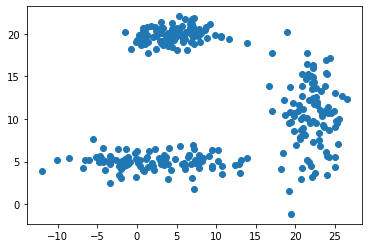

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.show()

## Implémentation du hierarchical clustering

### Initialisation de la classe

In [4]:
class DBSCAN:

  def __init__(self, epsilon:float, min_points:int)->None:
    """This function initialize the class with all the information we need to train a DBSCNA algorithm"""

    self.epsilon = epsilon
    self.min_points = min_points

In [5]:
dbs = DBSCAN(3, 5)

print(dbs.epsilon)
print(dbs.min_points)

3
5


### Calcul des distances

$$
d(a,b) = \sqrt {\sum ^n_{i=1} (a_i - b_i)^2}
$$


$a$ et $b$ sont deux points dans un plan euclidien de dimension $n$

$a_i$ et $b_i$ sont deux vecteurs depuis l'origine jusqu'au point $a$, $b$.

In [6]:
class DBSCAN:

  def __init__(self, epsilon:float, min_points:int)->None:
    """This function initialize the class with all the information we need to train a DBSCNA algorithm"""

    self.epsilon = epsilon
    self.min_points = min_points

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))


In [7]:
np.random.seed(123)
a = np.random.random((100, 2))
b = np.random.random((100, 2))

DBSCAN.euclidean_distance(a, b).shape

(100,)

### Identifier les observations

- core_point: Il a plus de $min\_points$ observations dans son voisinage de $epsilon$.
- border_point: Il a moins de $min\_points$ observations dans son voisinage de $epsilon$.
- noise_point: Il n'a aucune observations dans son voisinage de $epsilon$.

In [8]:
class DBSCAN:

  def __init__(self, epsilon:float, min_points:int)->None:
    """Cette fonction initialise la classe avec toutes les informations nécessaires pour entraîner un algorithme DBSCAN"""

    self.epsilon = epsilon
    self.min_points = min_points

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''Calcule la distance euclidienne entre deux vecteurs'''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def point_identification(self, dist:np.array, index:int)->tuple:
    '''Calcule l'identification d'un point en comptant le nombre de voisins proches'''

    bool_neighbors = list(map(lambda x : x<= self.epsilon, dist))

    neighbors_index = np.nonzero(bool_neighbors)

    number_neighbors = np.sum(bool_neighbors)
    #print(number_neighbors)

    if number_neighbors == 1:
      # 0 pour un point de bruit
      return (neighbors_index, 0)
    elif number_neighbors > self.min_points:
      # 1 pour un point central
      return (neighbors_index, 1)
    else :
      # 2 pour un point de bordure
      return (neighbors_index, 2)

In [9]:
np.random.seed(123)

a = np.random.random((100, 2))
b = [0.5, 0.5]

Test du noise_point

In [10]:
epsilon = 0.01
dbs = DBSCAN(epsilon, 5)

In [11]:
distance = DBSCAN.euclidean_distance(a, b)

In [12]:
dbs.point_identification(distance, a)

((array([], dtype=int64),), 2)

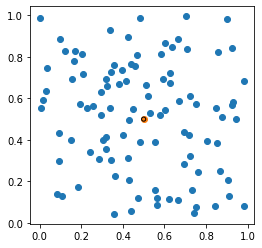

In [13]:
figure, axes = plt.subplots()
plt.scatter(a[:, 0], a[:, 1])
plt.scatter(b[0], b[1])
neighbors_zone = plt.Circle(xy=( 0.5 , 0.5 ), radius=epsilon, fill=False)
axes.set_aspect(1)
axes.add_artist(neighbors_zone)
plt.show()

Test d'un border_point

In [14]:
epsilon = 0.05
dbs = DBSCAN(epsilon, 5)

In [15]:
distance = DBSCAN.euclidean_distance(a, b)

In [16]:
neighbors_index, identification = dbs.point_identification(distance, a)
identification

0

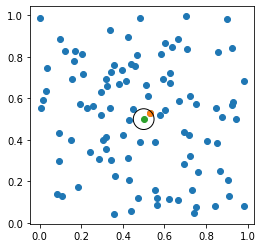

In [17]:
figure, axes = plt.subplots()
plt.scatter(a[:, 0], a[:, 1])
plt.scatter(a[neighbors_index, 0], a[neighbors_index, 1])
plt.scatter(b[0], b[1])
neighbors_zone = plt.Circle(xy=( 0.5 , 0.5 ), radius=epsilon, fill=False)
axes.set_aspect(1)
axes.add_artist(neighbors_zone)
plt.show()

Test d'un core point

In [18]:
epsilon = 0.15
dbs = DBSCAN(epsilon, 5)

In [19]:
distance = DBSCAN.euclidean_distance(a, b)

In [20]:
neighbors_index, identification = dbs.point_identification(distance, a)
identification

1

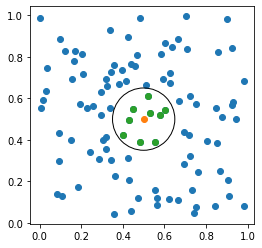

In [21]:
figure, axes = plt.subplots()
plt.scatter(a[:, 0], a[:, 1])
plt.scatter(b[0], b[1])
plt.scatter(a[neighbors_index, 0], a[neighbors_index, 1])
neighbors_zone = plt.Circle(xy=( 0.5 , 0.5 ), radius=epsilon, fill=False)
axes.set_aspect(1)
axes.add_artist(neighbors_zone)
plt.show()

### Déterminer le nombre de voisins

In [22]:
class DBSCAN:

  def __init__(self, epsilon:float, min_points:int)->None:
    """Cette fonction initialise la classe avec toutes les informations nécessaires pour entraîner un algorithme DBSCAN"""

    self.epsilon = epsilon
    self.min_points = min_points

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''Calcule la distance euclidienne entre deux vecteurs'''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def point_identification(self, dist:np.array, index:int)->tuple:
    '''Calcule l'identification d'un point en comptant le nombre de voisins proches'''

    bool_neighbors = list(map(lambda x : x <= self.epsilon, dist))

    neighbors_index = np.nonzero(bool_neighbors)

    number_neighbors = np.sum(bool_neighbors)
    #print(number_neighbors)

    if number_neighbors == 1:
      # 0 pour un point de bruit
      return (neighbors_index, 0)
    elif number_neighbors > self.min_points:
      # 1 pour un point central
      return (neighbors_index, 1)
    else :
      # 2 pour un point de bordure
      return (neighbors_index, 2)

  def number_neighbors(self, dataframe:np.ndarray, index:int)-> np.ndarray:
    """Calcule le nombre de voisins pour un index donné"""
    point = dataframe[index]

    # Calcule la distance entre x_i et dataframe[index]
    dist = DBSCAN.euclidean_distance(point, dataframe)

    # Identifie les voisins et leur attribut (bruit, bordure, ou central)
    neighbors_index, point_attribute =  self.point_identification(dist, index)

    # Supprime l'index du point lui-même de la liste des voisins
    neighbors_index_minus_point = np.setdiff1d(neighbors_index, index)

    return neighbors_index_minus_point, point_attribute

In [23]:
np.random.seed(123)

a = np.random.random((100, 2))

Test noise_point

In [24]:
epsilon = 0.01
dbs = DBSCAN(epsilon, 5)
neighbors_index, information = dbs.number_neighbors(a, 0)
information

0

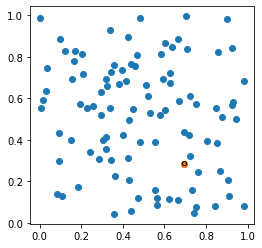

In [25]:
figure, axes = plt.subplots()
plt.scatter(a[:, 0], a[:, 1])
plt.scatter(a[0, 0], a[0, 1])
plt.scatter(a[np.squeeze(neighbors_index), 0], a[np.squeeze(neighbors_index), 1])
neighbors_zone = plt.Circle(xy=(a[0, 0], a[0, 1]), radius=epsilon, fill=False)
axes.set_aspect(1)
axes.add_artist(neighbors_zone)
plt.show()

Test border_point

In [26]:
epsilon = 0.1
dbs = DBSCAN(epsilon, 5)
neighbors_index, information = dbs.number_neighbors(a, 0)
information

2

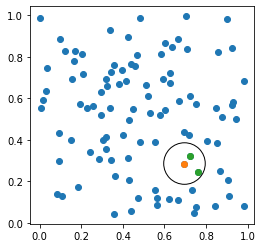

In [27]:
figure, axes = plt.subplots()
plt.scatter(a[:, 0], a[:, 1])
plt.scatter(a[0, 0], a[0, 1])
plt.scatter(a[np.squeeze(neighbors_index), 0], a[np.squeeze(neighbors_index), 1])
neighbors_zone = plt.Circle(xy=(a[0, 0], a[0, 1]), radius=epsilon, fill=False)
axes.set_aspect(1)
axes.add_artist(neighbors_zone)
plt.show()

Test core_point

In [28]:
epsilon = 0.2
dbs = DBSCAN(epsilon, 5)
neighbors_index, information = dbs.number_neighbors(a, 0)
information

1

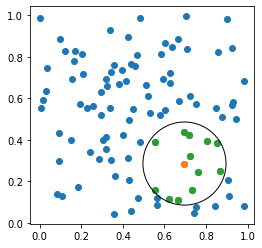

In [29]:
figure, axes = plt.subplots()
plt.scatter(a[:, 0], a[:, 1])
plt.scatter(a[0, 0], a[0, 1])
plt.scatter(a[neighbors_index, 0], a[neighbors_index, 1])
neighbors_zone = plt.Circle(xy=(a[0, 0], a[0, 1]), radius=epsilon, fill=False)
axes.set_aspect(1)
axes.add_artist(neighbors_zone)
plt.show()

### Entraînement du modèle

In [30]:
class DBSCAN:

  def __init__(self, epsilon:float, min_points:int)->None:
    """Cette fonction initialise la classe avec toutes les informations nécessaires pour entraîner un algorithme DBSCAN"""

    self.epsilon = epsilon
    self.min_points = min_points

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''Calcule la distance euclidienne entre deux vecteurs'''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def point_identification(self, dist:np.array, index:int)->tuple:
    '''Calcule l'identification d'un point en comptant le nombre de voisins proches'''
    bool_neighbors = list(map(lambda x : x <= self.epsilon, dist))
    neighbors_index = np.nonzero(bool_neighbors)
    number_neighbors = np.sum(bool_neighbors)
    #print(number_neighbors)
    if number_neighbors == 1:
      # 0 pour un point de bruit
      return (neighbors_index, 0)
    elif number_neighbors > self.min_points:
      # 1 pour un point central
      return (neighbors_index, 1)
    else :
      # 2 pour un point de bordure
      return (neighbors_index, 2)

  def number_neighbors(self, dataframe:np.ndarray, index:int)-> np.ndarray:
    """Calcule le nombre de voisins pour un index donné"""
    point = dataframe[index]
    # Calcule la distance entre x_i et dataframe[index]
    dist = DBSCAN.euclidean_distance(point, dataframe)

    # Identifie les voisins et leur attribut (bruit, bordure, ou central)
    neighbors_index, point_attribute =  self.point_identification(dist, index)

    # Supprime l'index du point lui-même de la liste des voisins
    neighbors_index_minus_point = np.setdiff1d(neighbors_index, index)

    return neighbors_index_minus_point, point_attribute

  def fit(self, dataframe:np.ndarray, visualization:bool=False):
    """Exécute l'algorithme DBSCAN pour effectuer le clustering sur les données"""
    # Initialisation du numéro de cluster
    c = 1
    noise = False

    # Initialisation des piles pour maintenir l'état
    current_stack = np.array([])  # Pile courante
    unvisited = np.array(range(dataframe.shape[0]))  # Indices des points non visités
    self.clusters = np.zeros(dataframe.shape[0])  # Tableau des clusters assignés

    # Boucle jusqu'à ce que tous les points aient été visités
    while (len(unvisited) != 0):

        # Choisir un point non visité au hasard
        current_stack = random.choice(unvisited)

        # Exécutez jusqu'à ce qu'un cluster soit complet
        while current_stack.size != 0:

          if current_stack.size > 1:
            index = current_stack[0]
          else :
            index = current_stack

          current_stack = np.setdiff1d(current_stack, index)

          neighbors_index, attribute = self.number_neighbors(dataframe, index)

          # Supprime le point de la liste des non visités
          unvisited = np.setdiff1d(unvisited, index)

          # Ne regarder que les points non visités
          neighbors_index = np.intersect1d(neighbors_index, unvisited)

          # Si le point courant est un point central
          if attribute == 1:

              # Assigner à un cluster
              self.clusters[index] = c

              # Ajouter les voisins à la pile
              current_stack = np.append(current_stack, neighbors_index)

          # Si le point courant est un point de bordure
          elif attribute == 2:
              # Assigner à un cluster
              self.clusters[index] = c

          # Si le point courant est du bruit
          elif attribute == 0:
              # Assigner à un cluster
              self.clusters[index] = c
              noise = True

          if visualization:
            # Affichage de la visualisation du clustering
            figure, axes = plt.subplots()
            plt.scatter(dataframe[:, 0], dataframe[:, 1], c=self.clusters)
            plt.scatter(dataframe[index, 0], dataframe[index, 1])
            neighbors_zone = plt.Circle(xy=(dataframe[index, 0], dataframe[index, 1]), radius=self.epsilon, fill=False)
            axes.set_aspect(1)
            axes.add_artist(neighbors_zone)
            plt.show()

        if not(noise):
          c += 1  # Passer au cluster suivant
        else:
          noise = False

In [41]:
epsilon = 3.5
dbs = DBSCAN(epsilon, 3)
dbs.fit(x_train)

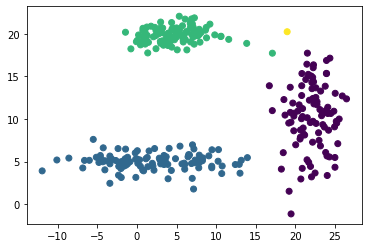

In [42]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=dbs.clusters)
plt.show()